<a href="https://colab.research.google.com/github/Yeeun16/class2019Spring_/blob/master/fashion_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

이미지 픽셀값의 범위에 0에서 255까지이다.
값의 범위를 0에서 1사이로 조정하기 위해 train set과 test set을 25로 나누어준다.

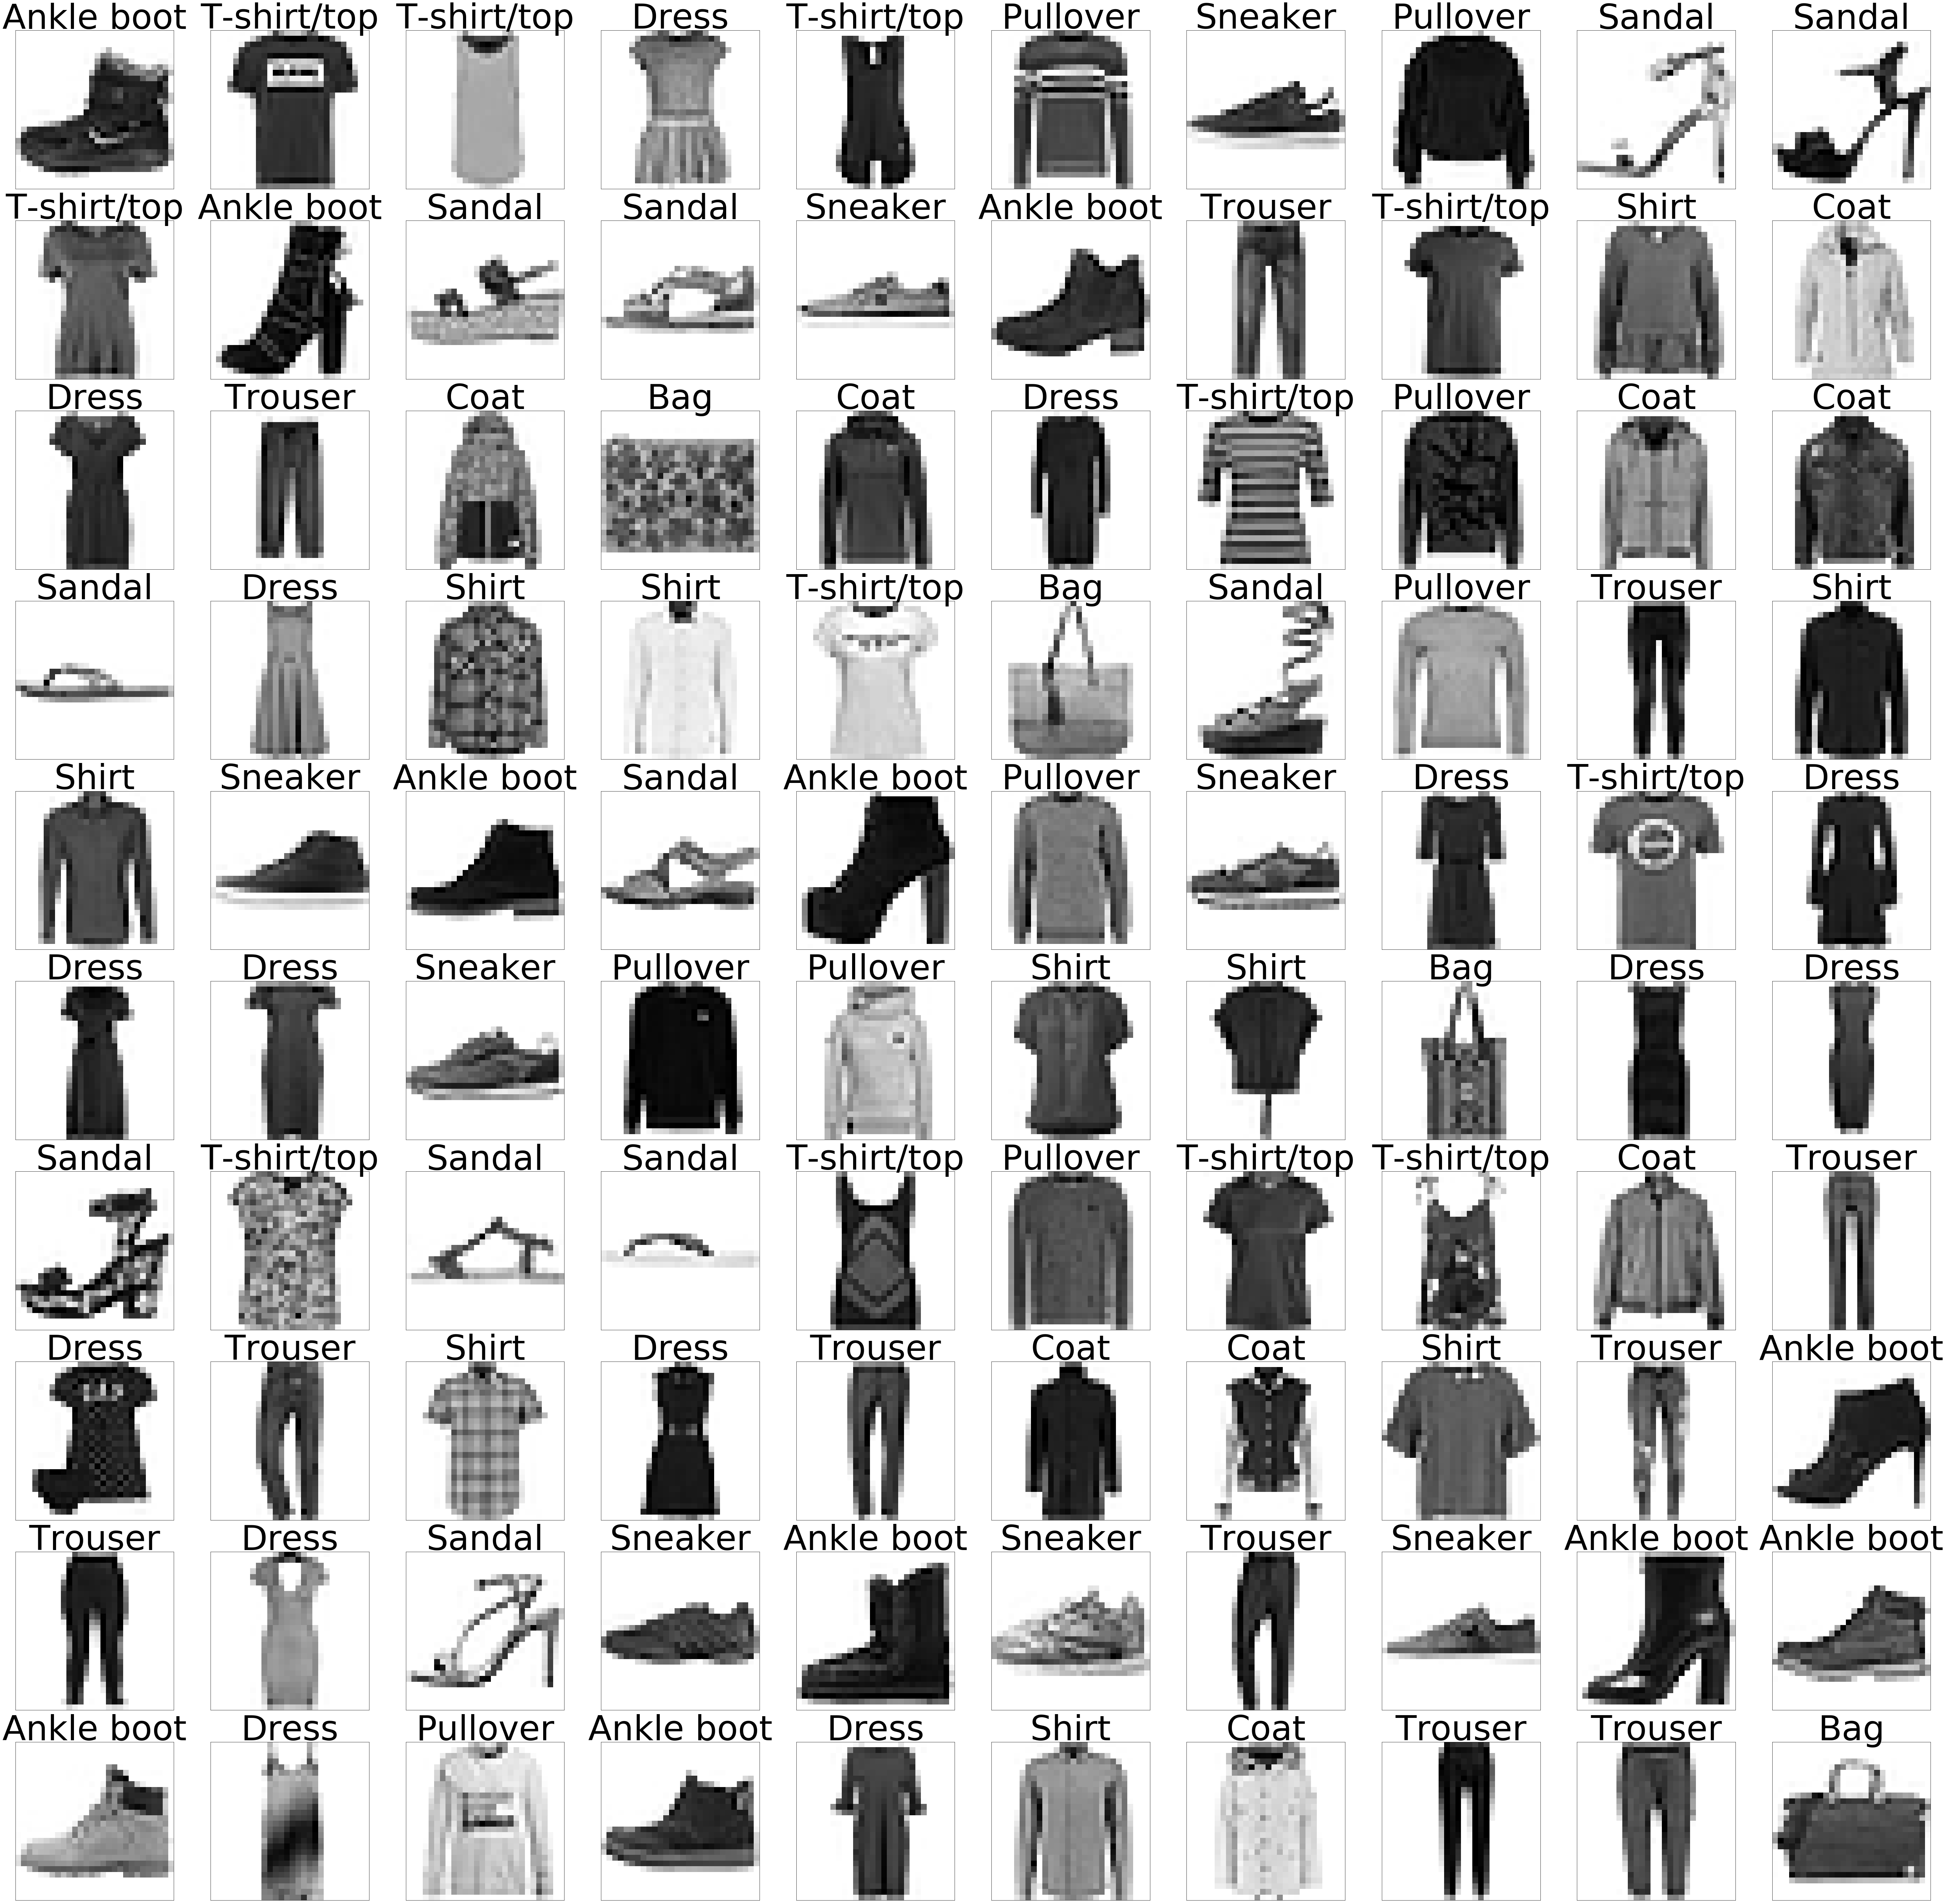

In [10]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(fashion_mnist[y_train[i]], fontsize=100)
plt.show()

binary-흑백으로 표현됨

In [17]:
x_train.shape[1:]

(28, 28)

In [0]:
img_rows, img_cols = x_train.shape[1:]      #x_train.shape[1:]는 (28, 28)

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Optimizer-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정한다. Loss function-훈련 하는 동안 모델의 오차를 측정한다. 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용한다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도(accuracy)를 사용한다.

In [24]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [27]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 12s 310us/sample - loss: 0.5165 - acc: 0.8210 - val_loss: 0.4476 - val_acc: 0.8401
Epoch 2/10
40199/40199 [==============================] - 12s 294us/sample - loss: 0.3863 - acc: 0.8610 - val_loss: 0.4076 - val_acc: 0.8525
Epoch 3/10
40199/40199 [==============================] - 12s 289us/sample - loss: 0.3463 - acc: 0.8740 - val_loss: 0.3599 - val_acc: 0.8705
Epoch 4/10
40199/40199 [==============================] - 11s 282us/sample - loss: 0.3180 - acc: 0.8830 - val_loss: 0.3695 - val_acc: 0.8628
Epoch 5/10
40199/40199 [==============================] - 11s 275us/sample - loss: 0.2947 - acc: 0.8916 - val_loss: 0.3215 - val_acc: 0.8847
Epoch 6/10
40199/40199 [==============================] - 11s 281us/sample - loss: 0.2780 - acc: 0.8988 - val_loss: 0.3363 - val_acc: 0.8773
Epoch 7/10
40199/40199 [==============================] - 11s 282us/sample - loss: 0.2643 - acc: 0.9028 

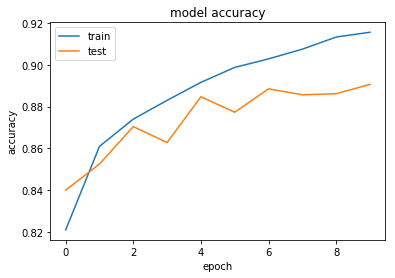

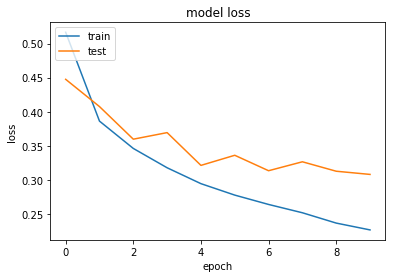

In [30]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pullover


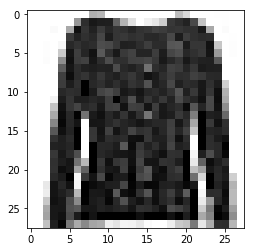

In [32]:
testID = 89
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID], cmap=plt.cm.binary)
out = model.predict(x_test[testID].reshape(1,img_rows, img_cols))
print(fashion_mnist[np.argmax(out)])

In [0]:
model.save_weights('fashion_mnist_weights.h5')
model.load_weights('fashion_mnist_weights.h5')